In [152]:
# import dependencies
import json
import pandas as pd
import os
import csv
import numpy
import requests
import matplotlib.pyplot as plt
from pprint import pprint

#set up API URL
api_key = "a2rOTe8PfBiJBwTOSlRbteARqAEa0s6DsRyoSOOF"
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'

search = 'school.degrees_awarded.predominant=3&_fields=id,school.name,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,school.region_id,latest.earnings.10_yrs_after_entry.median,latest.earnings.6_yrs_after_entry.median,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.3_yr_repayment.completers_rate'

search_url = url + search + '&api_key=' + api_key

response = requests.get(search_url)
response_json = response.json()


In [95]:
# # Store school id, name, regions, etc. in list

# school_ids_list = []
# schools_list = []
# regions_list = []
# school_ids_list = []
# tuition_in_state_list = []
# tuition_out_state_list = []
# list_earnings_10_yrs_after_entry = []
# list_earnings_6_yrs_after_entry = []

# for page in range (0,105):
#     search_url = f'{url}{search}&page={page}&api_key={api_key}'
#     response = requests.get(search_url)
#     response_json = response.json()
       
#     for num in range(0,20):
#         school_id = response_json['results'][num]['id']
#         school_ids_list.append(school_id)
#         school_name = response_json['results'][num]['school.name']
#         schools_list.append(school_name)  
#         region_id = response_json['results'][num]['school.region_id']
#         regions_list.append(region_id)              
#         tuition_in = response_json['results'][num]['latest.cost.tuition.in_state']
#         tuition_in_state_list.append(tuition_in)  
#         tuition_out = response_json['results'][num]['latest.cost.tuition.out_of_state']
#         tuition_out_state_list.append(tuition_out)
#         earnings_10yrs_after = response_json['results'][num]['latest.earnings.10_yrs_after_entry.median']
#         earnings_6yrs_after = response_json['results'][num]['latest.earnings.6_yrs_after_entry.median']
#         list_earnings_10_yrs_after_entry.append(earnings_10yrs_after)
#         list_earnings_6_yrs_after_entry.append(earnings_6yrs_after)

# # set up school info in dataframe and export to CSV 
# schoolinfo_df = pd.DataFrame({
#     "school_id": school_ids_list,
#     "school": schools_list,
#     "region": regions_list,
#     "tuition_in_state": tuition_in_state_list,
#     "tuition_out_state": tuition_out_state_list,
#     "earnings6years": list_earnings_6_yrs_after_entry,
#     "earnings10years": list_earnings_10_yrs_after_entry,
# })

# schoolinfo_df.to_csv("cost_earnings_stat_final.csv", index=False, header=True)


                
            


In [96]:
region_stats = pd.read_csv('cost_earnings_stat_final.csv')
region_stats.head()

,school_id,school,region,tuition_in_state,tuition_out_state,earnings6years,earnings10years
0,445188,University of California-Merced,8,13262.0,39944.0,36900.0,NaN
1,446792,Sanford-Brown College-Las Vegas,8,NaN,NaN,23500.0,29300.0
2,446808,Sanford-Brown College-Seattle,8,NaN,NaN,23500.0,29300.0
3,446048,Ave Maria University,5,19128.0,19128.0,29800.0,32800.0
4,446668,The Art Institute of Ohio-Cincinnati,3,NaN,NaN,27200.0,34100.0


In [97]:
#drop rows that are incomplete to avoid calculation errors
rs_dropna = region_stats.dropna()
rs_dropreset = rs_dropna.reset_index()

In [98]:
#create summary table for all region aggregate 
grouped_region_stats = rs_dropreset.groupby(['region']).mean()
region_mean = grouped_region_stats.drop(columns=["index", "school_id"])
region_mean['earnings_cost_ratio'] = region_mean['earnings6years']/region_mean['tuition_in_state']
region_mean


,tuition_in_state,tuition_out_state,earnings6years,earnings10years,earnings_cost_ratio
region,,,,,
0,1167.000000,1167.000000,65200.000000,88100.000000,55.869751
1,30432.262069,33810.744828,39262.758621,49565.517241,1.290169
2,26268.746835,29195.623418,37508.860759,48172.151899,1.427889
3,23815.112782,26737.172932,35620.300752,43248.120301,1.495702
4,20668.689474,22714.278947,35272.105263,41908.947368,1.706548
5,18446.201389,22543.636574,31878.935185,39556.250000,1.728211
6,16691.337931,21137.531034,34611.724138,41764.137931,2.073634
7,14733.661017,21206.762712,33837.288136,41572.881356,2.296597
8,24406.627778,29136.066667,37570.000000,47940.555556,1.539336


In [99]:
#list containing 'bins' for tuition
quartile_bins = []

#bin_names are given after tuition is binned i.e
#the bin_names are up for change
bins = [0,10000,18000,32000,100000]
bin_names = ["less_10k","10k_18k","18k_32k", "greater_32k"]

#list reference for obtaining min, median, and max tution
tuition_list = rs_dropreset['tuition_in_state']

#obtain 25th percentile, then append to list
twentyfive_Percentile = tuition_list.quantile(0.25)
quartile_bins.append(twentyfive_Percentile)

#obtain 50th percentile, then append to list
fifty_Percentile = tuition_list.quantile(0.50)
quartile_bins.append(fifty_Percentile)

#obtain 75th percentile, then append to list
seventyFive_Percentile = tuition_list.quantile(0.75)
quartile_bins.append(seventyFive_Percentile)

#obtain 100th percentile, then append to list
ninetyNine_Percentile = tuition_list.quantile(1)
quartile_bins.append(ninetyNine_Percentile)

#print bins list
quartile_bins

[9840.0, 18744.0, 31802.0, 55056.0]

In [100]:
#add Tuition Cost Tier column to dataframe
rs_dropreset["tuition_cost_tier"] = pd.cut(rs_dropreset["tuition_in_state"], bins, labels=bin_names)

#store variables for ratio calculations
cost = rs_dropreset['tuition_in_state']
earnings6 = rs_dropreset['earnings6years']
earnings10 = rs_dropreset['earnings10years']

#add columns for earnings/cost ratio, 6 - 10 year earnings growth ratio
rs_dropreset['earnings_cost_ratio'] = earnings6/cost
rs_dropreset['earnings_growth_y6_y10'] = earnings10/earnings6
rs_dropreset['weighted_growth_to_tuition'] = rs_dropreset['earnings_cost_ratio'] * rs_dropreset['earnings_growth_y6_y10']



In [101]:
#drop uneccesary columns for analysis
clean_info = rs_dropreset.drop(columns=['index', 'school_id', 'tuition_out_state'])


In [102]:
#organize seperate dataframes by cost tier for plotting + drop region 0 & 9 due to irrelevancy 
df0_10k = clean_info.loc[clean_info["tuition_cost_tier"] == 'less_10k']
df0_10k_edit0 = df0_10k[df0_10k.region != 0]
df0_10k_edit9 = df0_10k_edit0[df0_10k_edit0.region != 9]

df10_18k = clean_info.loc[clean_info["tuition_cost_tier"] == '10k_18k']
df10_18k_edit = df10_18k[df10_18k.region != 9]

df18_32 = clean_info.loc[clean_info["tuition_cost_tier"] == '18k_32k']

df32 = clean_info.loc[clean_info["tuition_cost_tier"] == 'greater_32k']

In [103]:
#aggregate mean value for plotting
df0_10k_grouped = df0_10k_edit9.groupby(['region']).mean()

df10_18k_grouped = df10_18k_edit.groupby(['region']).mean()

df18_32_grouped = df18_32.groupby(['region']).mean()

df32_grouped = df32.groupby(['region']).mean()


In [104]:
#set up lists containing calculated rations for plotting 
earningscost10k = [earningscost for earningscost in df0_10k_grouped['earnings_cost_ratio']]
earningsgrowth10k = [earnings for earnings in df0_10k_grouped['earnings_growth_y6_y10']]
weighted_growth10k = [worthit for worthit in df0_10k_grouped['weighted_growth_to_tuition']]

earningscost10k_18k = [earningscost for earningscost in df10_18k_grouped['earnings_cost_ratio']]
earningsgrowth10k_18k = [earnings for earnings in df10_18k_grouped['earnings_growth_y6_y10']]
weighted_growth10k_18k = [worthit for worthit in df10_18k_grouped['weighted_growth_to_tuition']]

earningscost18k_32k = [earningscost for earningscost in df18_32_grouped['earnings_cost_ratio']]
earningsgrowth18k_32k = [earnings for earnings in df18_32_grouped['earnings_growth_y6_y10']]
weighted_growth18k_32k = [worthit for worthit in df18_32_grouped['weighted_growth_to_tuition']]

earningscost32k = [earningscost for earningscost in df32_grouped['earnings_cost_ratio']]
earningsgrowth32kk = [earnings for earnings in df32_grouped['earnings_growth_y6_y10']]
weighted_growth32k = [worthit for worthit in df32_grouped['weighted_growth_to_tuition']]

In [105]:
#test group by region
df0_10k_grouped

,tuition_in_state,earnings6years,earnings10years,earnings_cost_ratio,earnings_growth_y6_y10,weighted_growth_to_tuition
region,,,,,,
1,8503.411765,34794.117647,41794.117647,4.122727,1.199156,4.927779
2,8057.203390,32432.203390,42828.813559,4.104814,1.315978,5.402779
3,7995.333333,32464.102564,39920.512821,4.165505,1.232107,5.107863
4,7555.980000,35282.000000,41696.000000,4.722024,1.182009,5.570131
5,7417.528000,30712.000000,38174.400000,4.328573,1.244960,5.361041
6,7437.767857,33580.357143,40396.428571,4.596561,1.212312,5.486618
7,7120.266667,33053.333333,41603.333333,4.917753,1.261313,6.148850
8,7448.177778,35982.222222,46977.777778,4.943573,1.322302,6.444753


In [106]:
# test list for earnings growth
earningsgrowth10k


[1.1991562624181586,
 1.315977542277181,
 1.2321069493605696,
 1.1820089887225371,
 1.2449601360084448,
 1.212312291577255,
 1.2613134900393914,
 1.3223019224292007]

In [107]:
#test list for weighted growth
weighted_growth10k

[4.927779380165525,
 5.402779220093983,
 5.107862738909037,
 5.570131005292019,
 5.361041003682313,
 5.4866179419358145,
 6.148849933396962,
 6.444752579204517]

Text(0,0.5,'Weighted Growth ($)')

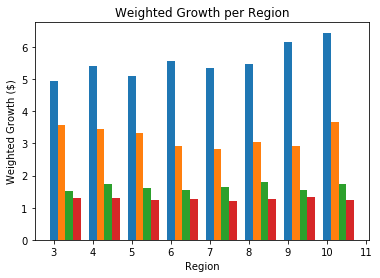

In [159]:
#test bar chart for growth mean 10k 

fig = plt.figure()
fig.add_subplot()

y1 = weighted_growth10k
y2 = weighted_growth10k_18k
y3 = weighted_growth18k_32k
y4 = weighted_growth32k

x_axis = [x + 2 for x in range(1,9)]
x_axis2 = [x + 2.2 for x in range(1,9)]
x_axis3 = [x + 2.4 for x in range(1,9)]
x_axis4 = [x + 2.6 for x in range(1,9)]

plt.bar(x_axis, y1, width = 0.2)
plt.bar(x_axis2, y2, width = 0.2)
plt.bar(x_axis3, y3, width = 0.2)
plt.bar(x_axis4, y4, width = 0.2)

plt.title("Weighted Growth per Region")
plt.xlabel("Region")
                   
plt.ylabel("Weighted Growth ($)")
